# Subway Data Analysis

## Introduction

O sistema de ônibus e trens de Nova Iorque - o Metro Transit Authority - fornece seus dados para download através de  arquivos csv. Uma das informações disponíveis são os dados das catracas do metrô que contém logs semanais de entradas cumulativas e saídas por catraca por estação de metrô em algum intervalo de tempo.


Neste projeto iremos utilizar apenas os das catraca disponíveis em: http://web.mta.info/developers/turnstile.html.




# Sobre este projeto

Neste projeto você irá aplicar todos os conhecimentos adquiridos neste primeiro mês de curso. Iremos praticar tarefas básicas de aquisição, limpeza de dados e nesse processo iremos descobrir coisas essenciais sobre os dados utilizando o que foi aprendido no curso de estatística. 

O objetivo deste projeto é explorar a relação entre os dados das catracas do metro de Nova Iorque e o clima no dia da coleta. Para isso, além dos dados do metrô, precisaremos os dados de clima da cidade de Nova Iorque. 

Os principais pontos que serão verificados neste trabalho:

- Coleta de dados da internet
- Utilização de estatística para análise de dados
- Manipulação de dados e criação de gráficos simples com o `Pandas`

*Como conseguir ajuda*: Sugerimos que tente os seguintes canais, nas seguintes ordens:

| Tipo de dúvida\Canais         	| Google 	| Fórum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Programação Pyhon e Pandas    	| 1      	| 2     	| 3     	|       	|
| Requisitos do projeto         	|        	| 1     	| 2     	| 3     	|
| Partes específicas do Projeto 	|        	| 1     	| 2     	| 3     	|

Os endereços dos canais são:

- Fórum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [udacity-br.slack.com](https://udacity-br.slack.com/messages/C5MT6E3E1)
- Email: data-suporte@udacity.com

**Espera-se que o estudante entregue este relatório com:**

- Todos os TODO feitos, pois eles são essenciais para que o código rode corretamente
- O arquivo ipynb exportado como html

Para entregar este projeto, vá a [sala de aula](https://coco.udacity.com/nanodegrees/nd111/locale/pt-br/versions/1.0.0/parts/339726/modules/339733/lessons/340886/project) e submeta o seu `.ipynb` e o html, zipados.

# Lembretes

Antes de começarmos, alguns lembretes devem ter em mente ao usar os notebooks iPython:

- Lembre-se de que você pode ver do lado esquerdo de uma célula de código quando foi executado pela última vez se houver um número dentro das chaves.
- Quando você inicia uma nova sessão do notebook, certifique-se de executar todas as células até o ponto em que você deixou a última vez. Mesmo que a saída ainda seja visível a partir de quando você executou as células em sua sessão anterior, o kernel começa em um estado novo, então você precisará recarregar os dados, etc. em uma nova sessão.
- O ponto anterior é útil para ter em mente se suas respostas não correspondem ao que é esperado nos questionários da aula. Tente recarregar os dados e execute todas as etapas de processamento um a um para garantir que você esteja trabalhando com as mesmas variáveis e dados que estão em cada fase do questionário.

## Seção 1 - Coleta de Dados

### *Exercicio 1.1*

Mãos a obra!! Agora é sua vez de coletar os dados. Escreva abaixo um código python que acesse o link http://web.mta.info/developers/turnstile.html e baixe os arquivos do mês de junho de 2017. O arquivo deverá ser salvo com o nome turnstile_100617.txt onde 10/06/17 é a data do arquivo.

Abaixo seguem alguns comandos que poderão te ajudar:

Utilize a biblioteca **urllib** para abrir e resgatar uma página da web. Utilize o comando abaixo onde **url** será o caminho da página da web onde se encontra o arquivo:

```python
u = urllib.urlopen(url)
html = u.read()
```

Utilize a biblioteca **BeautifulSoup** para procurar na página pelo link do arquivo que deseja baixar. Utilize o comando abaixo para criar o seu objeto *soup* e procurar por todas as tags 'a'no documento:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

Uma dica para baixar apenas os arquivos do mês de junho é verificar a data no nome do arquivo. Por exemplo, para baixar o arquivo do dia 17/06/2017 verifique se o link termina com *"turnstile_170610.txt"*. Se não fizer isso você baixará todos os arquivos da página. Para fazer isso utilize o comando conforme abaixo:

```python
if '1706' in link.get('href'):
```

E a dica final é utilizar o comando abaixo para fazer o download do arquivo txt:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Lembre-se, primeiro, carregue todos os pacotes e funções que você estará usando em sua análise.

In [1]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

#your code here

#definições do site e dos arquivos a baixar
url_site_metro = 'http://web.mta.info/developers/turnstile.html'
filtro_arqs_jun17 = 'turnstile_1706'

#acessa o site e obtém seu html
u = urlopen(url_site_metro)
html = u.read()

#obtém todos os links do site
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')

#obtém a lista de links para os arquivos de junho/2017
lista_links = []
for l in links:
    if l.get('href') and filtro_arqs_jun17 in l.get('href'):
       lista_links.append(l)
    
#para cada link obtido    
for link in lista_links:
    
    link_arq = ''

    #formata o link com o nome do arquivo
    if not url_site_metro.endswith('/'):
        link_arq = url_site_metro[:(url_site_metro.rfind('/') + 1)] + link.get('href')
    else:
        link_arq = url_site_metro + link.get('href')

    #obtém o nome do arquivo
    nome_arq = link_arq[(link_arq.rfind('/') + 1):]
    
    #faz o download do arquivo
    print('Download do link {} para {}'.format(link_arq, nome_arq))
    download = urlretrieve(link_arq, nome_arq)
    


Download do link http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt para turnstile_170624.txt
Download do link http://web.mta.info/developers/data/nyct/turnstile/turnstile_170617.txt para turnstile_170617.txt
Download do link http://web.mta.info/developers/data/nyct/turnstile/turnstile_170610.txt para turnstile_170610.txt
Download do link http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt para turnstile_170603.txt


### *Exercicio 1.2*

Escreva uma função que pegue a lista de nomes dos arquivos que você baixou no exercicio 1.1 e consolide-os em um único arquivo. Deve existir apenas uma linha de cabeçalho no arquivo de saida. 

Por exemplo, se o arquivo_1 tiver:
linha 1...
linha 2...

e o outro arquivo, arquivo_2 tiver:
linha 3...
linha 4...
linha 5...

Devemos combinar o arquivo_1 com arquivo_2 em um arquivo mestre conforme abaixo:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
linha 1...
linha 2...
linha 3...
linha 4...
linha 5...


In [2]:
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            # your code here
            with open(filename) as entrada:
                    next(entrada)
    
                    for linha in entrada:
                        dados_linha = linha.strip().split(",")
                        ca,unit,scp,station,linename,division,daten,timen,descn,entriesn,exitsn = dados_linha
                        master_file.write('{},{},{},{},{},{},{},{},{},{},{}\n'.format(ca,unit,scp,station,linename,division,daten,timen,descn,entriesn,exitsn))
                        

#vai criar o arquivo no mesmo diretório deste notebook
import glob, os
arq_cons = 'turnstile_1706_cons.txt'   
lista_arqs = []
os.chdir(".")

for arq in glob.glob("*.txt"):
    lista_arqs.append(arq)

create_master_turnstile_file(lista_arqs, arq_cons)


### *Exercicio 1.3*

Neste exercício, escreva um função que leia o master_file criado no exercicio anterior e carregue-o em um pandas dataframe. Esta função deve filtrar para que o dataframe possua apenas linhas onde a coluna "DESCn" possua o valor "Regular".

Por exemplo, se o data frame do pandas estiver conforme abaixo:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

O dataframe deverá ficar conforme abaixo depois de filtrar apenas as linhas onde a coluna DESCn possua o valor REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [1]:
import pandas as pd

def filter_by_regular(filename):
    
    turnstile_data = pd.read_csv(filename)
    # more of your code here
    
    filtro = turnstile_data[turnstile_data['DESCn']=='REGULAR']
    
    return filtro

arq = 'turnstile_1706_cons.txt'
arq_reg = filter_by_regular(arq)
print(arq_reg)

          C/A  UNIT       SCP        STATION  LINENAME  DIVISION       DATEn  \
0        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
1        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
2        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
3        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
4        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
5        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
6        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
7        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
8        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
9        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
10       A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
11       A002  R051  02-00-00          5

In [3]:
arq_reg.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,00:00:00,REGULAR,6195217,2098317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,04:00:00,REGULAR,6195240,2098318
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,08:00:00,REGULAR,6195256,2098347
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,12:00:00,REGULAR,6195346,2098432
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2017,16:00:00,REGULAR,6195518,2098491


### *Exercicio 1.4*


Os dados do metrô de NY possui dados cumulativos de entradas e saidas por linha. Assuma que você possui um dataframe chamado df que contém apenas linhas para uma catraca em particular (unico SCP, C/A, e UNIT). A função abaixo deve alterar essas entradas cumulativas para a contagem de entradas desde a última leitura (entradas desde a última linha do dataframe).

Mais especificamente, você deverá fazer duas coisas:

1 - Criar uma nova coluna chamada ENTRIESn_hourly
2 - Inserir nessa coluna a diferença enre ENTRIESn da coluna atual e a da coluna anterior. Se a linha possuir alguma NAN, preencha/substitua por 1.

Dica: as funções do pandas shift() e fillna() pode ser úteis nesse exercicio.

Abaixo tem um exemplo de como seu dataframe deve ficar ao final desse exercicio:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

as duas células de inclusão de colunas (1.4 e 1.5) podem ser executadas novamente, pois o dataframe está em memória, é sempre recarregado a cada execução.

In [6]:
import pandas

def get_hourly_entries(df):
    
    
    #your code here
    
    df['ENTRIESn_hourly'] = pandas.Series(df['ENTRIESn'] - df['ENTRIESn'].shift(1))
    df['ENTRIESn_hourly'] = df['ENTRIESn_hourly'].fillna(1)
    
    
    return df

In [9]:
arqmaster = 'turnstile_1706_cons.txt'
print(get_hourly_entries(filter_by_regular(arqmaster)))

          C/A  UNIT       SCP        STATION  LINENAME  DIVISION       DATEn  \
0        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
1        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
2        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
3        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
4        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
5        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
6        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
7        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
8        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
9        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
10       A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
11       A002  R051  02-00-00          5

### *Exercicio 1.5*

Faça o mesmo do exercicio anterior mas agora considerando as saidas, coluna EXITSn.
Para isso crie uma coluna chamada de EXITSn_hourly e insira a diferença entre a coluna EXITSn da linha atual versus a linha anterior. Se tiver algum NaN, preencha/substitua por 0.



In [10]:
import pandas

def get_hourly_exits(df):
    
    #your code here
    
    df['EXITSn_hourly'] = pandas.Series(df['EXITSn'] - df['EXITSn'].shift(1))
    df['EXITSn_hourly'] = df['EXITSn_hourly'].fillna(0)
    
    return df

In [11]:
arqmaster = 'turnstile_1706_cons.txt'
print(get_hourly_exits(get_hourly_entries(filter_by_regular(arqmaster))))

          C/A  UNIT       SCP        STATION  LINENAME  DIVISION       DATEn  \
0        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
1        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
2        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
3        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
4        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
5        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/27/2017   
6        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
7        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
8        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
9        A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
10       A002  R051  02-00-00          59 ST   NQR456W       BMT  05/28/2017   
11       A002  R051  02-00-00          5

### *Exercicio 1.6*

Dado uma variável de entrada que representa o tempo no formato de:
     "00:00:00" (hora: minutos: segundos)
    
Escreva uma função para extrair a parte da hora do tempo variável de entrada
E devolva-o como um número inteiro. Por exemplo:
         
         1) se a hora for 00, seu código deve retornar 0
         2) se a hora for 01, seu código deve retornar 1
         3) se a hora for 21, seu código deve retornar 21
        
Por favor, devolva a hora como um número inteiro.


In [13]:
from datetime import datetime

def time_to_hour(time):
    
    hour = datetime.strptime(time, '%H:%M:%S').time().hour # your code here
    return hour

In [14]:
print(time_to_hour('21:35:00'))

21


## Exercicio 2 - Análise dos dados

### *Exercicio 2.1*

Para verificar a relação entre o movimento do metrô e o clima, precisaremos complementar os dados do arquivo já baixado com os dados do clima.
Nós complementamos para você este arquivo com os dados de clima de Nova Iorque  e disponibilizamos na área de materiais do projeto. Você pode acessa-lo pelo link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Agora que temos nossos dados em um arquivo csv, escreva um código python que leia este arquivo e salve-o em um data frame do pandas. 

Dica: 

Utilize o comando abaixo para ler o arquivo:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [65]:
import pandas as pd

filename = "turnstile_data_master_with_weather.csv"

#your code here

df_metro_clima = pd.read_csv(filename, sep=",")

In [66]:
df_metro_clima.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


### *Exercicio 2.2*

Agora crie uma função que calcule a quantidade de dias chuvosos, para isso retorne a contagem do numero de dias onde a coluna *"rain"* é igual a 1.

Dica: Você também pode achar que a interpretação de números como números inteiros ou float pode não
     funcionar inicialmente. Para contornar esta questão, pode ser útil converter
     esses números para números inteiros. Isso pode ser feito escrevendo cast (coluna como inteiro).
     Então, por exemplo, se queríamos lançar a coluna maxtempi como um número inteiro, nós devemos
     escrever algo como cast (maxtempi as integer) = 76, em oposição a simplesmente
     onde maxtempi = 76.

**ATENÇÃO**: como não estava conseguindo fazer corretamente a contagem pegando direto no dataframe, importei a biblioteca de sql do pandas para facilitar a montagem das consultas. Isso porque a contagem teria que pegar o distinct da coluna de data.

In [67]:
import pandasql

In [72]:


def num_rainy_days(df):

    #your code here
    
    q = """
    select COUNT(DISTINCT DATEn) num_rainy_days from df where rain = 1 ;
    """
    
    contagem = pandasql.sqldf(q, locals())
    return contagem
    

In [73]:
print(num_rainy_days(df_metro_clima))

   num_rainy_days
0              10


### *Exercicio 2.3*

Calcule se estava nebuloso ou não (0 ou 1) e a temperatura máxima para fog (isto é, a temperatura máxima 
     para dias nebulosos).

In [85]:

def max_temp_aggregate_by_fog(df):
    
    #your code here 
    
    q = """
    select daten, fog, maxtempi  from df group by fog ;
    """
    
    maxtemp_fog = pandasql.sqldf(q, locals())
    
    return(maxtemp_fog)
    



In [86]:
print(max_temp_aggregate_by_fog(df_metro_clima))

        DATEn  fog  maxtempi
0  2011-05-30  0.0      86.0
1  2011-05-24  1.0      81.0


### *Exercicio 2.4

Calcule agora a média de 'meantempi' nos dias que são sábado ou domingo (finais de semana):

In [87]:
df_metro_clima.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


In [88]:
def avg_weekend_temperature(filename):
  
    q = """
    select avg(meantempi) from filename where cast (strftime('%w', daten) as integer) in (0,6);
    """
    avg_wknd =  pandasql.sqldf(q, locals())
    
    return avg_wknd

In [89]:
print(avg_weekend_temperature(df_metro_clima))

   avg(meantempi)
0       65.100667


### *Exercicio 2.5

Calcule a média da temperatura mínima 'mintempi' nos dias chuvosos onde da temperatura mínima foi maior que do 55 graus:

In [91]:
def avg_min_temperature(filename):

    q = """
    select avg(mintempi) from filename where (rain = 1) and (mintempi > 55);
    """
    avg_min_temp_rainy =  pandasql.sqldf(q, locals())
    
    return avg_min_temp_rainy

In [92]:
print(avg_min_temperature(df_metro_clima))

   avg(mintempi)
0       61.23886


### *Exercicio 2.6

Antes de realizar qualquer análise, pode ser útil olhar para os dados que esperamos analisar. Mais especificamente, vamos examinR as entradas por hora em nossos dados do metrô de Nova York para determinar a distribuição dos dados. Estes dados são armazenados na coluna ['ENTRIESn_hourly'].
    
Trace dois histogramas nos mesmos eixos para mostrar as entradas quando esta chovendo vs quando não está chovendo. 
Abaixo está um exemplo sobre como traçar histogramas com pandas e matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

In [94]:
df = pd.read_csv("turnstile_data_master_with_weather.csv")

In [95]:
df.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


In [98]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def entries_histogram(turnstile_weather):
    
    bins30 = np.linspace(0, df['ENTRIESn_hourly'].max(), num=30)
    
    bins = 150
    alpha = 0.5
    xmin = ymin = 0
    xmax = 6000
    ymax = 45000
    
    plt.figure()
    
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==1].hist(bins=bins, alpha=alpha, label = 'Rain') # your code here to plot a histogram for hourly entries when it is raining
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==0].hist(bins=bins, alpha=alpha, label = 'Rain') # your code here to plot a histogram for hourly entries when it is not raining
        
    plt.axis([xmin, xmax, ymin, ymax])
    plt.suptitle('Histogram of ENTRIESn_hourly')
    plt.title("bin of 150")
    plt.xlabel('ENTRIESn_hourly')
    plt.ylabel('Frequency')
    plt.legend()

    plt.figure()
    
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\extre\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

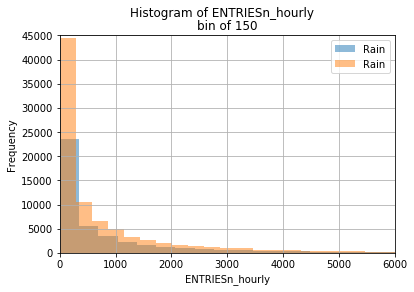

In [99]:
entries_histogram(df)

### *Exercicio 2.7

Os dados que acabou de plotar que tipo de ditribuição? Existe diferença na distribuição entre dias chuvosos e não chuvosos?

** Resposta **: é uma distribuição assimétrica ou oblíqua, com inclinação ou obliquidade positiva.

### *Exercicio 2.8

Construa uma função que que retorne:

1. A média das entradas com chuva
2. A média das entradas sem chuva




In [105]:
import numpy as np

import pandas
import pandasql

def means(turnstile_weather):
    
    
    ### YOUR CODE HERE ###
    
    with_rain = turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 1]
    without_rain = turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 0]
    
    with_rain_mean = np.mean(with_rain)
    without_rain_mean = np.mean(without_rain)
    
    p = 0 
    
    return with_rain_mean, without_rain_mean, p # leave this line for the grader

In [106]:
print(means(df))

(1105.4463767458733, 1090.278780151855, 0)


Responda as perguntas abaixo de acordo com a saida das suas funções:

1. Qual a média das entradas com chuva?
2. Qual a média das entradas sem chuva?


** Resposta **: 
1. Média das entradas com chuva = 1105.4463767458733
2. Média das entradas sem chuva = 1090.278780151855

**ATENÇÃO**: Não entendi o parâmetro de retorno "p". Após pesquisar, vi que se trata do "p-value", conceito que não foi, até o momento, abordado, e seu valor é obtido por uma função chamada "Mann Whitney", que acabei achando na biblioteca scipi, mas preferi não colocar no código. Espero que o resultado acima não seja desconsiderado, pois foi solicitado somente o cálculo das duas médias. 

## Exercicio 3 - Map Reduce

### *Exercicio 3.1*

A entrada para esse exercício e o mesmo arquivo da seção anterior (Exercicio 2). Você pode baixar o arquivo neste link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Varmos criar um mapeador agora. Para cada linha de entrada, a saída do mapeador deve IMPRIMIR (não retornar) a UNIT como uma chave e o número de ENTRIESn_hourly como o valor. Separe a chave e o valor por uma guia. Por exemplo: 'R002 \ t105105.0'

Exporte seu mapeador em um arquivo chamado mapper_result.txt e envie esse arquivo juntamente com a sua submissão. O código para exportar seu mapeador já está escrito no código abaixo.




In [127]:
df = pd.read_csv("turnstile_data_master_with_weather.csv")
df.head()
df.dtypes

Unnamed: 0           int64
UNIT                object
DATEn               object
TIMEn               object
Hour                 int64
DESCn               object
ENTRIESn_hourly    float64
EXITSn_hourly      float64
maxpressurei       float64
maxdewpti          float64
mindewpti          float64
minpressurei       float64
meandewpti         float64
meanpressurei      float64
fog                float64
rain               float64
meanwindspdi       float64
mintempi           float64
meantempi          float64
maxtempi           float64
precipi            float64
thunder            float64
dtype: object

In [12]:
import sys

def mapper():
    

    for line in sys.stdin:
        # your code here
        data = line.strip().split(',')
        
        if data[0] == '':
            continue
        
        if len(data) == 22:
           a1, UNIT, DATEn, TIMEn, Hour, DESCn = data[:6]
           ENTRIESn_hourly, EXITSn_hourly, maxpressurei, maxdewpti = data[6:10]
           mindewpti, minpressurei, meandewpti, meanpressurei, fog = data[10:15]
           rain, meanwindspdi, mintempi, meantempi, maxtempi, precipi, thunder = data[15:]
        
        
        print("{0}\t{1}".format(UNIT, ENTRIESn_hourly))
              



sys.stdin = open('turnstile_data_master_with_weather.csv')
sys.stdout = open('mapper_result.txt', 'w')
mapper()

Saída gerada com sucesso no arquivo mapper_result.txt

### *Exercicio 3.2*

Agora crie o redutor. Dado o resultado do mapeador do exercicio anterior, o redutor deve imprimir(Não retornar) uma linha por UNIT, juntamente com o número total de ENTRIESn_hourly.Ao longo de maio (que é a duração dos nossos dados), separados por uma guia. Um exemplo de linha de saída do redutor pode ser assim: 'R001 \ t500625.0'

Você pode assumir que a entrada para o redutor está ordenada de tal forma que todas as linhas correspondentes a uma unidade particular são agrupados. No entanto a saida do redutor terá repetição pois existem lojas que aparecem em locais diferentes dos arquivos.

Exporte seu redutor em um arquivo chamado reducer_result.txt e envie esse arquivo juntamente com a sua submissão.

In [14]:
#!/usr/bin/python

import sys

def reducer():

    totalEntries = 0
    oldKey = None

    for line in sys.stdin:
        data_mapped = line.strip().split("\t")
        if len(data_mapped) != 2:
            continue

        thisKey, thisEntry = data_mapped

        if oldKey and oldKey != thisKey:
            print(oldKey, "\t", totalEntries)
            oldKey = thisKey;
            totalEntries = 0

        oldKey = thisKey
        try:
            totalEntries += float(thisEntry)
        except Exception as e:
            print("Erro ao tentar converter o string = ", thisEntry)
    

    if oldKey != None:
        print(oldKey, "\t", totalEntries)


sys.stdin = open('mapper_result.txt')
sys.stdout = open('reducer_result.txt', 'w')
reducer()

Ufa. Isso cansou.